# Section 3 - t-distributed Stochastic Neighbor Embedding

### t-SNE
- t-SNE is a nonlinear algorithms developed by Laurens van der Maaten and Geoffrey Hinton.

- The name of the algorithm comes from its incorporation of the "t" distribution and stochastic neighbour embedding.

- t-SNE does not provide any transformation model, because it modifies the outputs directly to minimize the cost function.
No other data can be transformed but that which the algorithm was just fitted to.

### Basic concept - symmetric SNE
t-SNE tries to preserve distances between each input vector.

1) Create a probability distribution p(i, j) where sigma is a hyperparameter:

\begin{equation*}
p_{ij} = \frac{\exp\left(-\left || x_i - x_j\right | |^2 \big/ 2\sigma^2\right)}{\displaystyle\sum_{k \neq l} \exp\left(-\left|| x_k - x_l\right||^2 \big/ 2\sigma^2\right)}
\end{equation*}

2) Initialize randomly low-dimensional mapping Y (N by k vector, where k << D) and define q(i,j) as: 

\begin{equation*}
q_{ij} = \frac{\exp\left(-\left || y_i - y_j\right | |^2 \right)}{\displaystyle\sum_{k \neq l} \exp\left(-\left|| y_k - y_l\right||^2 \right)}
\end{equation*}

With symetric SNE, it is not important how far something is from itself thus:
\begin{equation*}
p_{ij}  = q_{ij} = 0
\end{equation*}

The goal is to obtain p(i, j) as close to q(i, j) as possible.

In order to compare two probability distributions, we can use Kullback-Leibler (KL) divergence:
\begin{equation*}
C  = KL(P || Q) = \sum_{i} \sum_{j} p_{ij} log \frac{p_{ij}}{q_{ij}}
\end{equation*}

An apptoximated solution is obtained by calculating the derivative of the cost function C and gradient descent:
\begin{equation*}
\frac{\delta C}{\delta y_{i}} = 4 \sum_{j} (p_{ij}-q_{ij})(y_{i} - y_{j})
\end{equation*}

This model has no weights, so the update affects the mapping directly.

Symmetric SNE suffers from crowding problem.

### t-SNE 
t-SNE uses t-distribution for the q mapping:

\begin{equation*}
q_{ij} = \frac{\left(1+\left|| y_i - y_j\right||^2 \right)^{-1}}{\displaystyle\sum_{k \neq i} \left(1+\left|| y_i - y_j\right||^2 \right)^{-1}}
\end{equation*}

And a different p:
\begin{equation*}
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
\end{equation*}
\begin{equation*}
p_{j|i} = \frac{\exp\left(-\left| x_i - x_j\right|^2 \big/ 2\sigma_i^2\right)}{\displaystyle\sum_{k \neq i} \exp\left(-\left| x_i - x_k\right|^2 \big/ 2\sigma_i^2\right)}
\end{equation*}

### t-SNE limitations
- Huge RAM requirements
- We need to calculate q(i,j) and p(i,j) for i in range (1, N) and j in range (1, N) thus the algorithm grows N-squared times
- Default Ski-kit learn method Barnes-Hut runs in O(NlogN) time which is better, but still requires a lot of RAM.

## Examples - Gaussian Clouds

In [1]:
import numpy as np

In [2]:
# Defines centers of the clouds on the 
centers = np.array([[ 1,  1,  1],
                    [ 1,  1, -1],
                    [ 1, -1,  1],
                    [ 1, -1, -1],
                    [-1,  1,  1],
                    [-1,  1, -1],
                    [-1, -1,  1],
                    [-1, -1, -1]]) * 3

In [3]:
# Create the clouds, Gaussian samples centered at
data = []
points_per_cloud = 200
for c in centers:
    cloud = np.random.randn(points_per_cloud, 3) + c
    data.append(cloud)
data = np.concatenate(data)

In [4]:
# Generate colors for better visualization
colors = np.array([[i] * points_per_cloud for i in range(len(centers))]).flatten()

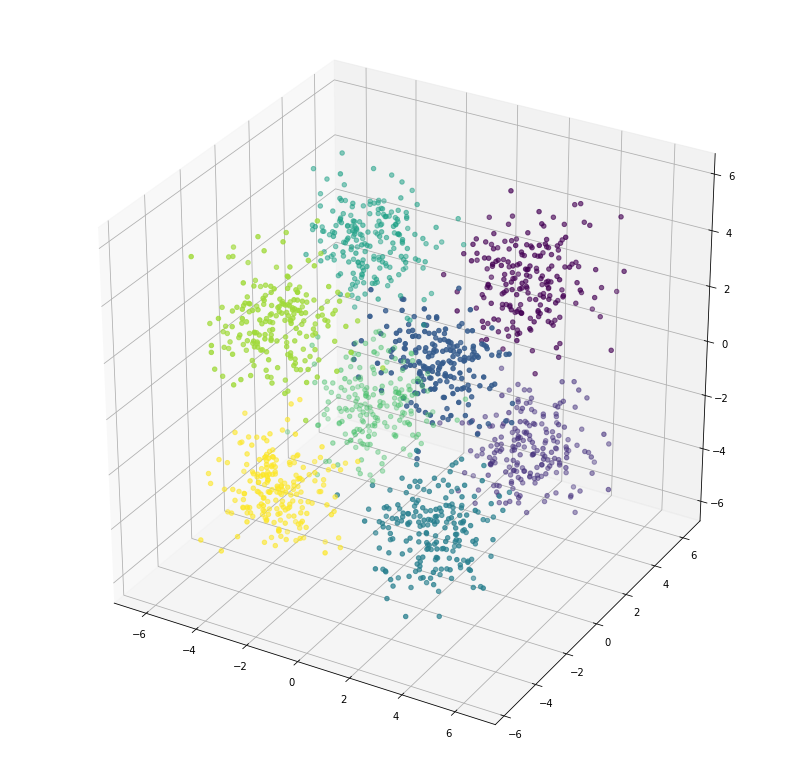

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (14, 14))
ax = fig.add_subplot(111, projection='3d')
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]
ax.scatter(x, y, z, c = colors)
plt.show()

In [6]:
## T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, 
            verbose = 1, 
            method = 'barnes_hut')
transformed = tsne.fit_transform(data)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.709318
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.922132
[t-SNE] Error after 125 iterations: 0.922132


In [7]:
new_x = transformed[:, 0]
new_y = transformed[:, 1]

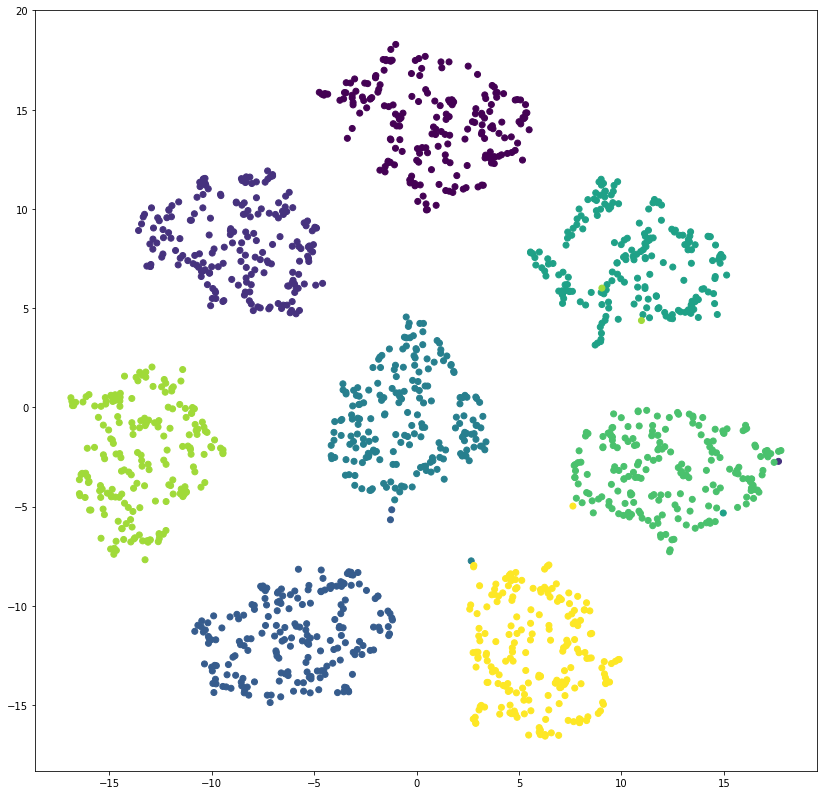

In [8]:
plt.figure(figsize = (14, 14))
plt.scatter(new_x, new_y, c = colors)
plt.show()

## Example - Donut

In [9]:
# Generate the donut data
N = 600
R_inner = 10
R_outer = 20

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)
R1 = np.random.randn(N // 2) + R_inner
theta = 2*np.pi*np.random.random(N // 2)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(N // 2) + R_outer
theta = 2*np.pi*np.random.random(N//2)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X = np.concatenate([X_inner, X_outer])
Y = np.array([0]*(N // 2) + [1]*(N // 2))


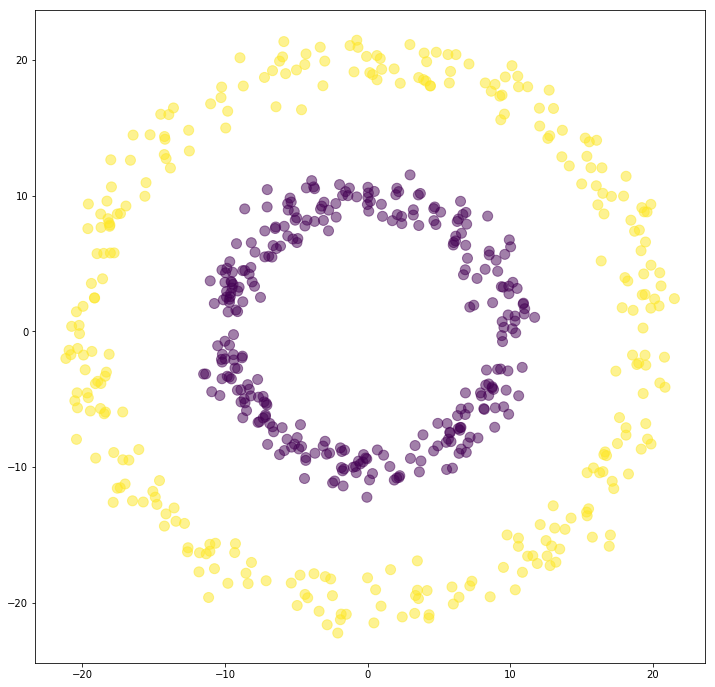

In [10]:
plt.figure(figsize = (12, 12))
plt.scatter(X[:,0], X[:,1], s = 100, c = Y, alpha = 0.5)
plt.show()

In [11]:
# Perform T-SNE manifold on the data
# From http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html : 
# "The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. 
# Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. 
# The choice is not extremely critical since t-SNE is quite insensitive to this parameter.
tsne = TSNE(perplexity = 40)
Z = tsne.fit_transform(X)

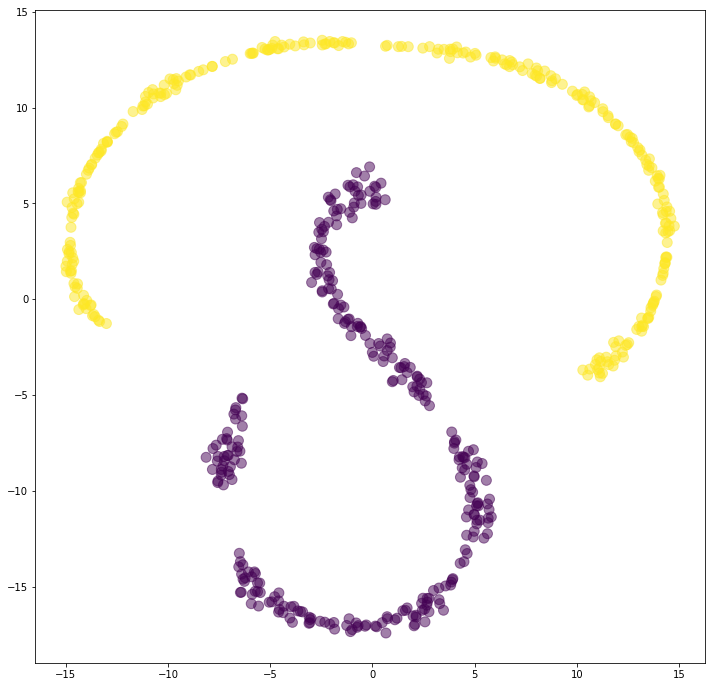

In [12]:
plt.figure(figsize = (12, 12))
plt.scatter(Z[:,0], 
            Z[:,1], 
            s = 100, 
            c = Y, 
            alpha = 0.5)
plt.show()

## Example - XOR

In [13]:
# Generate the data
X1 = np.random.random((100, 2))
X2 = np.random.random((100, 2)) - np.array([1, 1])
X3 = np.random.random((100, 2)) - np.array([1, 0])
X4 = np.random.random((100, 2)) - np.array([0, 1])
X = np.vstack((X1, X2, X3, X4))
Y = np.array([0] * 200 + [1] * 200)

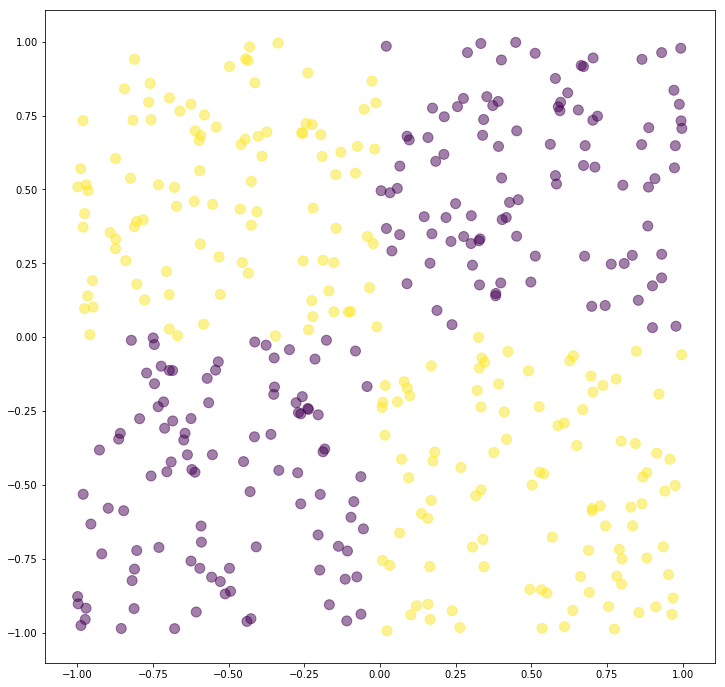

In [14]:
# Visualize the data
plt.figure(figsize = (12, 12))
plt.scatter(X[:,0], 
            X[:,1], 
            s = 100, 
            c = Y, 
            alpha = 0.5)
plt.show()

In [15]:
tsne = TSNE(perplexity = 40)
Z = tsne.fit_transform(X)

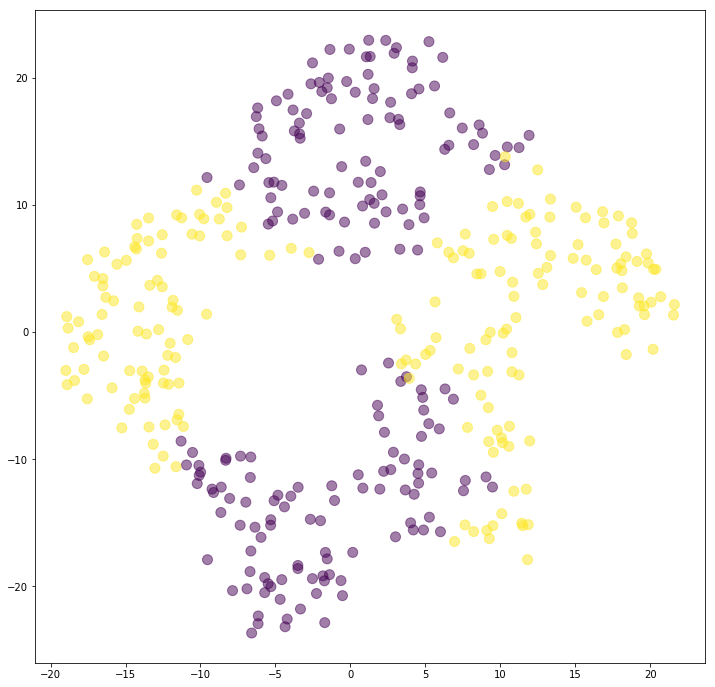

In [16]:
plt.figure(figsize = (12, 12))
plt.scatter(Z[:,0], 
            Z[:,1], 
            s = 100, 
            c = Y, 
            alpha = 0.5)
plt.show()